Import the necessary libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
import warnings
warnings.filterwarnings('ignore')
import recordlinkage
import pingouin

In [3]:
# import necessary function from helper_functions
from helper_functions import bowl_list_dict_init, bowl_row_append, bowl_database_init

In [4]:
# defining relevant variables for the bowl_database_init function
bowl_url1 = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page='
bowl_url2 = ';template=results;type=bowling'
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=1;template=results;type=bowling'

last_page = 39

In [5]:
# creating a bowler dataframe
bowl_df = bowl_database_init(last_page, bowl_url1, bowl_url2)

In [6]:
bowl_df.head()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10
0,M Muralidaran (ICC/SL),1992-2010,133,230,44039,18180,800,9/51,16/220,22.72,2.47,55.0,67,22
1,SK Warne (AUS),1992-2007,145,273,40705,17995,708,8/71,12/128,25.41,2.65,57.4,37,10
2,JM Anderson (ENG),2003-2023,183,341,39217,18234,690,7/42,11/71,26.42,2.78,56.8,32,3
3,A Kumble (IND),1990-2008,132,236,40850,18355,619,10/74,14/149,29.65,2.69,65.9,35,8
4,SCJ Broad (ENG),2007-2023,167,309,33698,16719,604,8/15,11/121,27.68,2.97,55.7,20,3


In [7]:
bowl_df.tail()

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10
1895,AH Bakewell (ENG),1931-1935,6,1,18,8,0,-,-,-,2.66,-,0,0
1896,A Balbirnie (IRE),2018-2023,7,1,6,8,0,-,-,-,8.00,-,0,0
1897,GS Ballance (ENG/ZIM),2014-2023,24,2,12,5,0,-,-,-,2.50,-,0,0
1898,M Baqa Jilani (IND),1936-1936,1,1,90,55,0,-,-,-,3.66,-,0,0
1899,AB Barath (WI),2009-2012,15,1,6,4,0,-,-,-,4.00,-,0,0


In [8]:
bowl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  1900 non-null   object
 1   Span    1900 non-null   object
 2   Mat     1900 non-null   object
 3   Inns    1900 non-null   object
 4   Balls   1900 non-null   object
 5   Runs    1900 non-null   object
 6   Wkts    1900 non-null   object
 7   BBI     1900 non-null   object
 8   BBM     1900 non-null   object
 9   Ave     1900 non-null   object
 10  Econ    1900 non-null   object
 11  SR      1900 non-null   object
 12  5       1900 non-null   object
 13  10      1900 non-null   object
dtypes: object(14)
memory usage: 207.9+ KB


In [9]:
# finding number of rows where the Average is null and needs to be dropped
len(bowl_df[bowl_df['Ave'] == '-'])

25

In [10]:
# dropping the rows where Ave is '-'
rows_drop = bowl_df[bowl_df['Ave'] == '-'].index
bowl_df_clean = bowl_df.drop(index = rows_drop, axis = 0)
bowl_df_clean.tail(10)

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10
1865,JJ Warr (ENG),1951-1951,2,3,584,281,1,1/76,1/139,281.00,2.88,584.0,0,0
1866,C Washbrook (ENG),1937-1956,37,2,36,33,1,1/25,1/25,33.00,5.50,36.0,0,0
1867,ED Weekes (WI),1948-1958,48,10,122,77,1,1/8,1/8,77.00,3.78,122.0,0,0
1868,RGCE Wijesuriya (SL),1982-1985,4,5,586,294,1,1/68,1/77,294.00,3.01,586.0,0,0
1869,CM Willoughby (SA),2003-2003,2,3,300,125,1,1/47,1/79,125.00,2.50,300.0,0,0
1870,JW Wilson (AUS),1956-1956,1,2,216,64,1,1/25,1/64,64.00,1.77,216.0,0,0
1871,J Worrall (AUS),1885-1899,11,3,255,127,1,1/97,1/97,127.00,2.98,255.0,0,0
1872,GN Yallop (AUS),1976-1984,39,10,192,116,1,1/21,1/21,116.00,3.62,192.0,0,0
1873,Yashpal Sharma (IND),1979-1983,37,3,30,17,1,1/6,1/6,17.00,3.40,30.0,0,0
1874,B Yograj Singh (IND),1981-1981,1,1,90,63,1,1/63,1/63,63.00,4.20,90.0,0,0


In [11]:
# making the columns correct data type
bowl_df_clean['Ave'] = bowl_df_clean['Ave'].astype('float64')
bowl_df_clean['Mat'] = bowl_df_clean['Mat'].astype('int32')
bowl_df_clean['Inns'] = bowl_df_clean['Inns'].astype('int32')
bowl_df_clean['Balls'] = bowl_df_clean['Balls'].astype('int32')
bowl_df_clean['Runs'] = bowl_df_clean['Runs'].astype('int32')
bowl_df_clean['Wkts'] = bowl_df_clean['Wkts'].astype('int32')

In [12]:
bowl_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 0 to 1874
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1875 non-null   object 
 1   Span    1875 non-null   object 
 2   Mat     1875 non-null   int32  
 3   Inns    1875 non-null   int32  
 4   Balls   1875 non-null   int32  
 5   Runs    1875 non-null   int32  
 6   Wkts    1875 non-null   int32  
 7   BBI     1875 non-null   object 
 8   BBM     1875 non-null   object 
 9   Ave     1875 non-null   float64
 10  Econ    1875 non-null   object 
 11  SR      1875 non-null   object 
 12  5       1875 non-null   object 
 13  10      1875 non-null   object 
dtypes: float64(1), int32(5), object(8)
memory usage: 183.1+ KB


In [13]:
mask = bowl_df_clean['Wkts'] > 50
bowl_df_clean = bowl_df_clean[mask]

<AxesSubplot:xlabel='Ave', ylabel='Count'>

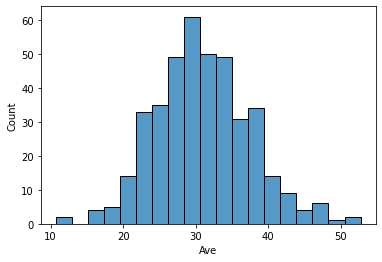

In [14]:
sns.histplot(data = bowl_df_clean, x = 'Ave')

In [15]:
bowl_df_clean.sort_values('Ave', ascending = False)

,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10
235,Mohammad Sami (PAK),2001-2012,36,66,7499,4483,85,5/36,8/106,52.74,3.58,88.2,2,0
282,Shahadat Hossain (BAN),2005-2015,38,60,5380,3731,72,6/27,9/97,51.81,4.16,74.7,4,0
164,CL Hooper (WI),1987-2002,102,145,13794,5635,114,5/26,7/178,49.42,2.45,121.0,4,0
328,GRJ Matthews (AUS),1983-1993,33,47,6271,2942,61,5/103,10/249,48.22,2.81,102.8,2,1
236,DBL Powell (WI),2002-2009,37,66,7077,4068,85,5/25,7/114,47.85,3.44,83.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,CTB Turner (AUS),1887-1895,17,30,5179,1670,101,7/43,12/87,16.53,1.93,51.2,11,2
86,SF Barnes (ENG),1901-1914,27,50,7873,3106,189,9/103,17/159,16.43,2.36,41.6,24,7
393,W Barnes (ENG),1880-1890,21,28,2289,793,51,6/28,9/81,15.54,2.07,44.8,3,0
327,JJ Ferris (AUS/ENG),1887-1892,9,16,2302,775,61,7/37,13/91,12.70,2.01,37.7,6,1


In [16]:
# use pingouoin to perform a normality test
normal_test = pingouin.normality(bowl_df_clean['Ave'])
normal_test

,W,pval,normal
Ave,0.993568,0.084392,True


Results of the test show that the averages of all test bowlers follows a normal distribution. This allows the mean and the standard deviation to be calculated

In [17]:
np.mean(bowl_df_clean['Ave']),np.std(bowl_df_clean['Ave'])

(31.02637717121589, 6.520299645771283)